# Dynamical Decoupling (DD) Simulation
## Special case: m=2 and t1=t2=t
Ideal system:  **$e^{-iZt}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t}$**
#### Want to prove: 
**$e^{-i(Z+\lambda{X})t}Ze^{-i(Z+\lambda{X})t}Z \approx e^{-2iZt}$** 

### Libraries and Pauli Matrices 

In [4]:
import numpy as np
import scipy
import math
from scipy.linalg import expm, svd
import matplotlib.pyplot as plt

In [5]:
X, Z, I = np.matrix([[0, 1],[1, 0]]), np.matrix([[1, 0],[0, -1]]), np.matrix([[1, 0],[0, 1]])

### Simulation code

In [7]:
# creating the variables
time = []
epsilon = []

# set the value of lambda
lambda_value = 0.1

# simulating the equation for every 0.01s for 1s.
for t in np.linspace(0.0,1.0,num=101):
    A = expm(-1j*(Z+lambda_value*X)*t)*Z*expm(-1j*(Z+lambda_value*X)*t)*Z
    B = expm(-2j*Z*t)
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues,_ = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    # add the maximum eigen value to the array epsilon
    epsilon.append(max_eigenvalue)
    time.append(t) 
    
print("error at t1 = t2 = " + str(time[5]) + " is " + str(epsilon[5]))

error at t1 = t2 = 0.05 is 0.0004995820845829024


## Graph t vs $\epsilon$

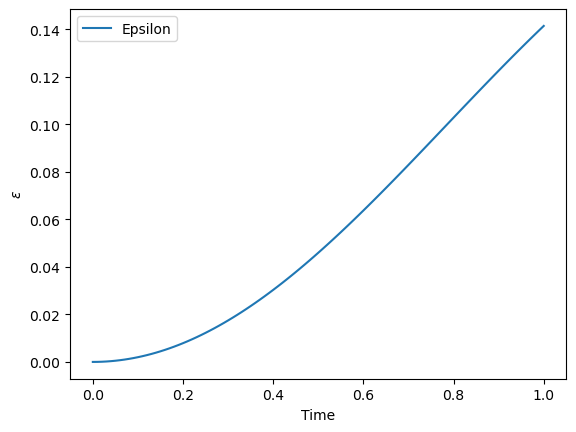

In [9]:
# graph the changes in epsilon respect to the time
plt.plot(time, epsilon, label = "Epsilon")

plt.xlabel('Time')
plt.ylabel('$\epsilon$')
plt.legend()

plt.savefig('first_simulation.png')
plt.show()


## General case
The generalization of the previou case is:\
Ideal system: **$e^{-iZt_1}e^{-iZt_2}e^{-iZt_3}...e^{-iZt_m}$** \
Noisy system: **$e^{-i(Z+\lambda{X})t_1}e^{-i(Z+\lambda{X})t_2}e^{-i(Z+\lambda{X})t_3}...e^{-i(Z+\lambda{X})t_m}$**
#### Want to simulate
**$\epsilon=||(e^{-i(Z+\lambda{X})t_1}Ze^{-i(Z+\lambda{X})t_2}Ze^{-i(Z+\lambda{X})t_3}Ze^{-i(Z+\lambda{X})t_4}Z...Ze^{-i(Z+\lambda{X})t_m}Z) - e^{-iZ(t_1+t_2+t_3+...+t_m)}||$**
### Simulation


In [11]:
def error_calculation(lambda_value, m, T, areEqual, t_values):
    prev_A = I
    T = 0.1
    
    # Case when t1 = t2 = ... = tm
    if (areEqual==True):
        
        for i in np.linspace(1,m,num=m):
            # even numbers
            if (i%2 == 0):
                A = prev_A * expm(-1j*(Z-lambda_value*X)*T/m)
            # odd numbers
            else:
                A = prev_A * expm(-1j*(Z+lambda_value*X)*T/m)
            prev_A = A
    
    # Case when all t have a different value        
    else:
        i = 1
        # simulating the equation 
        for t in t_values:
            # even numbers
            if (i%2 == 0):
                A = prev_A * expm(-1j*(Z-lambda_value*X)*T/t)
                
            # odd numbers
            else:
                A = prev_A * expm(-1j*(Z+lambda_value*X)*T/t)
            # updating variables
            #print(A)
            prev_A = A 
            i+=1  
            
    B = expm(-1j*Z*(T)) 
    # calculate the difference between the ideal and noisy system
    difference = A - B
    # get the maximum eigen value of the difference matrix
    eigenvalues = svd(difference, compute_uv = False)
    max_eigenvalue = np.max(eigenvalues)
    #print("The error is ", max_eigenvalue)
    return max_eigenvalue

In [12]:
# creating the variables
m_value_c1 = []
m_value_c2 = [2,3,6,11]
error_c1 = []
error_c2 = []

# set the value of lambda and T
lambda_value = 0.1
T = 0.1

print("Case 1 ##########################")
for m in range(2,11,2):
    error_c1.append(error_calculation(lambda_value, m, T, True, []))
    m_value_c1.append(m)
    print("For m = " + str(m) + " the error is " + str(error_calculation(lambda_value, m, T, True, [])))

print("\nCase 2 ##########################")
error_c2.append(error_calculation(lambda_value, 2, T, False, [2,2]))
print("For m = 2 the error is " + str(error_calculation(lambda_value, m, T, False, [2,2])))

error_c2.append(error_calculation(lambda_value, 3, T, False, [4,2,4]))
print("For m = 3 the error is " + str(error_calculation(lambda_value, m, T, False, [4,2,4])))

error_c2.append(error_calculation(lambda_value, 6, T, False, [8,4,8,8,4,8]))
print("For m = 6 the error is " + str(error_calculation(lambda_value, m, T, False, [8,4,8,8,4,8])))

error_c2.append(error_calculation(lambda_value, 11, T, False, [16,8,16,16,8,8,8,16,16,8,16]))
print("For m = 11 the error is " + str(error_calculation(lambda_value, m, T, False, [16,8,16,16,8,8,8,16,16,8,16])))


Case 1 ##########################
For m = 2 the error is 0.0004995820845829024
For m = 4 the error is 0.0002496353782160249
For m = 6 the error is 0.00016640438462257455
For m = 8 the error is 0.0001247982491792856
For m = 10 the error is 9.983673349871192e-05

Case 2 ##########################
For m = 2 the error is 0.0004995820845829024
For m = 3 the error is 1.249909813324557e-05
For m = 6 the error is 1.8775597696427797e-07
For m = 11 the error is 2.606462738292785e-08


## Graph t vs $\epsilon$

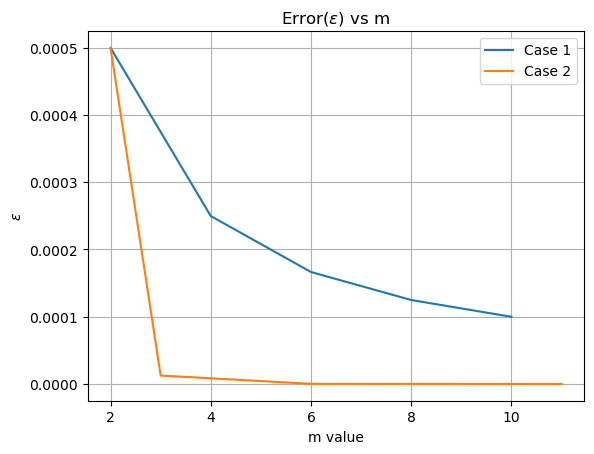

In [14]:
# graph the changes of the error for different values of m
plt.plot(m_value_c1, error_c1, label = "Case 1")
plt.plot(m_value_c2, error_c2, label = "Case 2")

plt.title('Error($\epsilon$) vs m')
plt.xlabel('m value')
plt.ylabel('$\epsilon$')
#plt.xticks([2, 3, 4, 6, 8,10, 11], ['2', '3', '4', '6', '8', '10', '11'])
plt.legend()
plt.grid()

plt.savefig('general_simulation.png')
plt.show()
